# EDA Case Study - Part II

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing all the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 50)

In [3]:
# Reading data from local

df_application_data = pd.read_csv("application_data.csv",encoding='latin1')
df_previous_application = pd.read_csv("previous_application.csv",encoding='latin1')

In [ ]:
# Cleaning the missing data

# listing the null values columns having more than 50%

emptycol = round((df_application_data.isnull().sum()/len(df_application_data.index)*100),2)
print('Dataset before dropping columns :',df_application_data.shape)

In [ ]:
# Removing those 64 columns 

df_application_data.drop(columns=[i for i, v in emptycol.items() if v>=50], inplace=True)
print('Dataset after dropping columns :',df_application_data.shape)

In [ ]:
# Getting columns which are having less percentage null values

hv_null_val = [i for i, v in emptycol.items() if v<=14 and v!=0]
hv_null_val

In [ ]:
# Removing unwanted columns

unwanted=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

df_application_data.drop(labels=unwanted,axis=1,inplace=True)

In [ ]:
# Checking datatypes of columns

# df_application_data.dtypes

for c in df_application_data.columns:
    print("---- %s ---" % c)
    print(df_application_data[c].value_counts())

In [ ]:
# Changing negative values to absolute valuesfor columns  - DAYS_REGISTRATION, DAYS_BIRTH, DAYS_EMPLOYED, DAYS_ID_PUBLISH

df_application_data['DAYS_REGISTRATION'] = df_application_data['DAYS_REGISTRATION'].abs()
df_application_data['DAYS_BIRTH'] = df_application_data['DAYS_BIRTH'].abs()
df_application_data['DAYS_EMPLOYED'] = df_application_data['DAYS_EMPLOYED'].abs()
df_application_data['DAYS_ID_PUBLISH'] = df_application_data['DAYS_ID_PUBLISH'].abs()

In [ ]:
# Checking for DAYS_REGISTRATION, DAYS_BIRTH, DAYS_EMPLOYED, DAYS_ID_PUBLISH verification

df_application_data[['DAYS_REGISTRATION', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH']].head()

In [ ]:
# Typecasting categorical columns into object type

categorical_col = ['TARGET', 'CNT_CHILDREN', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 
'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']

df_application_data[categorical_col] = df_application_data[categorical_col].astype(object)
df_application_data.head()


In [ ]:
# Verifying the datatype after conversion

df_application_data.dtypes

#### Quick Stats on Previous Application data

In [26]:
df_previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
df_previous_application.shape

(1670214, 37)

In [37]:
df_previous_application.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [9]:
nullcol = round((df_previous_application.isnull().sum()/len(df_previous_application.index)*100),2)
print('Dataset before dropping columns :',df_previous_application.shape)

Dataset before dropping columns : (1670214, 37)


In [28]:
for c in df_previous_application.columns:
    print("---- %s ---" % c)
    print(df_previous_application[c].value_counts())

---- SK_ID_PREV ---
1000983    1
2428426    1
1026910    1
1024863    1
2448896    1
          ..
1287969    1
1294114    1
1292067    1
1281828    1
1001961    1
Name: SK_ID_PREV, Length: 1670214, dtype: int64
---- SK_ID_CURR ---
187868    77
265681    73
173680    72
242412    68
206783    67
          ..
382489     1
426056     1
454726     1
380442     1
124145     1
Name: SK_ID_CURR, Length: 338857, dtype: int64
---- NAME_CONTRACT_TYPE ---
Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: NAME_CONTRACT_TYPE, dtype: int64
---- AMT_ANNUITY ---
2250.000     31865
11250.000    13974
6750.000     13442
9000.000     12496
22500.000    11903
             ...  
30073.860        1
41845.365        1
36622.620        1
41864.760        1
63715.905        1
Name: AMT_ANNUITY, Length: 357959, dtype: int64
---- AMT_APPLICATION ---
0.000         392402
45000.000      47831
225000.000     43543
135000.000     40678
450000.000     38905


XNA                     855720
Consumer electronics    398265
Connectivity            276029
Furniture                57849
Construction             29781
Clothing                 23949
Industry                 19194
Auto technology           4990
Jewelry                   2709
MLM partners              1215
Tourism                    513
Name: NAME_SELLER_INDUSTRY, dtype: int64
---- CNT_PAYMENT ---
12.0    323049
6.0     190461
0.0     144985
10.0    141851
24.0    137764
18.0     77430
36.0     72583
60.0     53600
48.0     47316
8.0      30349
4.0      26924
30.0     16924
14.0      8253
42.0      7136
16.0      5710
5.0       3957
54.0      2104
20.0      1805
7.0       1434
9.0       1236
3.0       1100
15.0       904
11.0       669
72.0       139
13.0        51
17.0        48
84.0        45
22.0        37
23.0        27
26.0        13
35.0        11
66.0        10
29.0         8
28.0         8
32.0         6
19.0         6
34.0         4
59.0         4
45.0         3
41.0        

In [29]:
for c in df_previous_application.columns:
    print(c)

SK_ID_PREV
SK_ID_CURR
NAME_CONTRACT_TYPE
AMT_ANNUITY
AMT_APPLICATION
AMT_CREDIT
AMT_DOWN_PAYMENT
AMT_GOODS_PRICE
WEEKDAY_APPR_PROCESS_START
HOUR_APPR_PROCESS_START
FLAG_LAST_APPL_PER_CONTRACT
NFLAG_LAST_APPL_IN_DAY
RATE_DOWN_PAYMENT
RATE_INTEREST_PRIMARY
RATE_INTEREST_PRIVILEGED
NAME_CASH_LOAN_PURPOSE
NAME_CONTRACT_STATUS
DAYS_DECISION
NAME_PAYMENT_TYPE
CODE_REJECT_REASON
NAME_TYPE_SUITE
NAME_CLIENT_TYPE
NAME_GOODS_CATEGORY
NAME_PORTFOLIO
NAME_PRODUCT_TYPE
CHANNEL_TYPE
SELLERPLACE_AREA
NAME_SELLER_INDUSTRY
CNT_PAYMENT
NAME_YIELD_GROUP
PRODUCT_COMBINATION
DAYS_FIRST_DRAWING
DAYS_FIRST_DUE
DAYS_LAST_DUE_1ST_VERSION
DAYS_LAST_DUE
DAYS_TERMINATION
NFLAG_INSURED_ON_APPROVAL


**Removing the columns having null value percentage greater than 50**

In [10]:
df_previous_application.drop(columns=[i for i, v in nullcol.items() if v>=50], inplace=True)
print('Dataset after dropping columns :',df_previous_application.shape)

Dataset after dropping columns : (1670214, 33)


In [31]:
for c in df_previous_application.columns:
    print(c)

SK_ID_PREV
SK_ID_CURR
NAME_CONTRACT_TYPE
AMT_ANNUITY
AMT_APPLICATION
AMT_CREDIT
AMT_GOODS_PRICE
WEEKDAY_APPR_PROCESS_START
HOUR_APPR_PROCESS_START
FLAG_LAST_APPL_PER_CONTRACT
NFLAG_LAST_APPL_IN_DAY
NAME_CASH_LOAN_PURPOSE
NAME_CONTRACT_STATUS
DAYS_DECISION
NAME_PAYMENT_TYPE
CODE_REJECT_REASON
NAME_TYPE_SUITE
NAME_CLIENT_TYPE
NAME_GOODS_CATEGORY
NAME_PORTFOLIO
NAME_PRODUCT_TYPE
CHANNEL_TYPE
SELLERPLACE_AREA
NAME_SELLER_INDUSTRY
CNT_PAYMENT
NAME_YIELD_GROUP
PRODUCT_COMBINATION
DAYS_FIRST_DRAWING
DAYS_FIRST_DUE
DAYS_LAST_DUE_1ST_VERSION
DAYS_LAST_DUE
DAYS_TERMINATION
NFLAG_INSURED_ON_APPROVAL


## Merging the data sets on SK_ID_CURR

In [49]:
merged_df = pd.merge(left=df_application_data,right=df_previous_application,how='inner',on='SK_ID_CURR', suffixes='_x')

In [50]:
merged_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_,AMT_ANNUITY_,AMT_GOODS_PRICE_,NAME_TYPE_SUITE_,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START_,HOUR_APPR_PROCESS_START_,REG_REGION_NOT_LIVE_REGION,...,HOUR_APPR_PROCESS_STARTx,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITEx,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,Laborers,WEDNESDAY,10,0,...,9,Y,1,XAP,Approved,-606,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,MONDAY,11,0,...,12,Y,1,XNA,Approved,-746,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,MONDAY,11,0,...,17,Y,1,XAP,Approved,-828,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,MONDAY,11,0,...,15,Y,1,XAP,Approved,-2341,Cash through the bank,XAP,Family,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,Laborers,MONDAY,9,0,...,5,Y,1,XAP,Approved,-815,Cash through the bank,XAP,Unaccompanied,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0


In [52]:

# Renaming the columns

merge_df = merged_df.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)

In [56]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 83 columns):
SK_ID_CURR                         1413701 non-null int64
TARGET                             1413701 non-null object
NAME_CONTRACT_TYPE                 1413701 non-null object
CODE_GENDER                        1413701 non-null object
FLAG_OWN_CAR                       1413701 non-null object
FLAG_OWN_REALTY                    1413701 non-null object
CNT_CHILDREN                       1413701 non-null object
AMT_INCOME_TOTAL                   1413701 non-null float64
AMT_CREDIT                         1413701 non-null float64
AMT_ANNUITY                        1413608 non-null float64
AMT_GOODS_PRICE_                   1412493 non-null float64
NAME_TYPE_SUITE_                   1410175 non-null object
NAME_INCOME_TYPE                   1413701 non-null object
NAME_EDUCATION_TYPE                1413701 non-null object
NAME_FAMILY_STATUS                 1413701 non-null object

## Performing Univariate Analysis on the merged Dataset

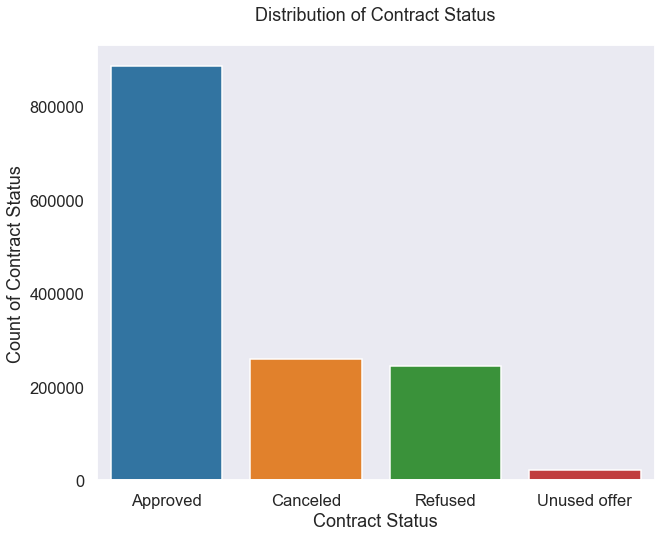

In [59]:
# Distribution of Contract Status

plt.figure(figsize=(10,8))

sns.countplot(merge_df.NAME_CONTRACT_STATUS)
plt.xlabel("Contract Status")
plt.ylabel("Count of Contract Status")
plt.title("Distribution of Contract Status")
plt.show()


**Getting the percentages of approved loans**

In [87]:
approved = merge_df[merge_df.NAME_CONTRACT_STATUS=='Approved']
refused = merge_df[merge_df.NAME_CONTRACT_STATUS=='Refused']
canceled = merge_df[merge_df.NAME_CONTRACT_STATUS=='Canceled']
unused = merge_df[merge_df.NAME_CONTRACT_STATUS=='Unused Offer']

In [88]:
percentage_approved=(len(approved)*100)/len(merge_df)
percentage_refused=(len(refused)*100)/len(merge_df)
percentage_canceled=(len(canceled)*100)/len(merge_df)
percentage_unused=(len(unused)*100)/len(merge_df)

print("The Percentage of people whose loans have been Approved is:",round(percentage_approved,2),"%")
print("The Percentage of people whose loans have been Refused is:",round(percentage_refused,2),"%")
print("The Percentage of people whose loans have been Canceled is:",round(percentage_canceled,2),"%")
print("The Percentage of people whose loans have been Unused is:",round(percentage_unused,2),"%")

The Percentage of people whose loans have been Approved is: 62.68 %
The Percentage of people whose loans have been Refused is: 17.36 %
The Percentage of people whose loans have been Canceled is: 18.35 %
The Percentage of people whose loans have been Unused is: 0.0 %


**Based on the distribution of Contract Status above we can observe the following -**
    The percentage of whose loan have been approved is around 62% and that of the refused is around 17%

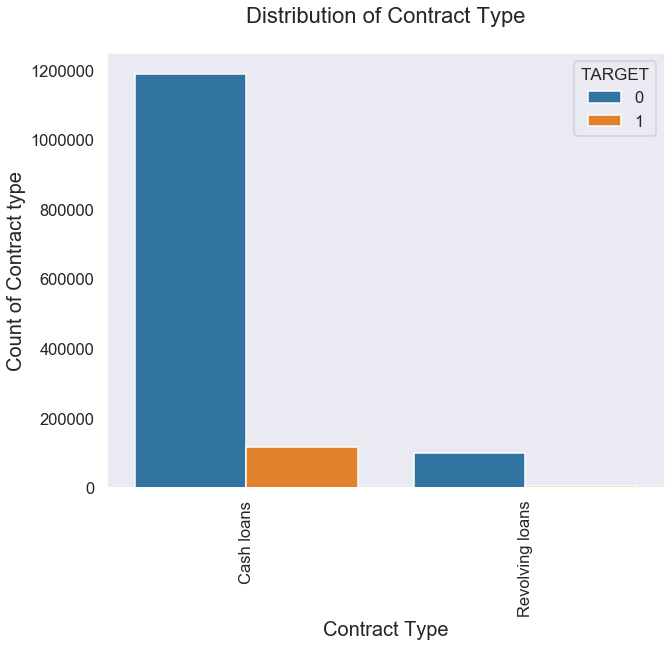

In [96]:
# Distribution of Contract Type

plt.figure(figsize=(10,8))

sns.countplot(merge_df.NAME_CONTRACT_TYPE, hue = merge_df.TARGET)
plt.xlabel("Contract Type")
plt.xticks(rotation=90)
plt.ylabel("Count of Contract type")
plt.title("Distribution of Contract Type")
plt.show()


In [92]:
merge_data_target1 = merge_df.loc[merge_df["TARGET"] == 1]
CONTRACT_TYPE_DEFAULTERS = merge_data_target1.pivot_table(index='NAME_CONTRACT_TYPE',values='SK_ID_CURR', aggfunc = 'count')
CONTRACT_TYPE_DEFAULTERS = pd.DataFrame(CONTRACT_TYPE_DEFAULTERS.to_records())
CONTRACT_TYPE_DEFAULTERS["Percentage_distribution"] = 0
CONTRACT_TYPE_DEFAULTERS["Percentage_distribution"] = CONTRACT_TYPE_DEFAULTERS["SK_ID_CURR"]/CONTRACT_TYPE_DEFAULTERS["SK_ID_CURR"].sum()
print(CONTRACT_TYPE_DEFAULTERS)

  NAME_CONTRACT_TYPE  SK_ID_CURR  Percentage_distribution
0         Cash loans      116529                 0.952346
1    Revolving loans        5831                 0.047654


**Based on the distribution of Contract type above we can observe the following -**
There is a higher rate of defaulters on the cash loans when compared to the revolving loans

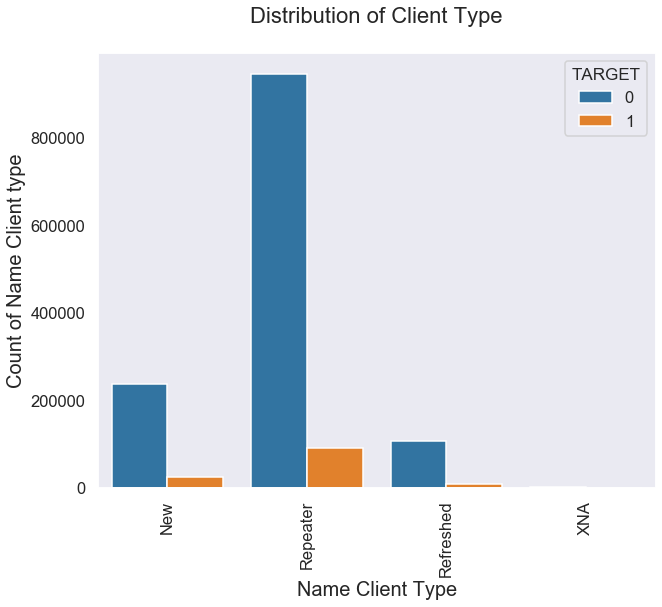

In [98]:
# Distribution of Client Type Status

plt.figure(figsize=(10,8))

sns.countplot(merge_df.NAME_CLIENT_TYPE, hue = merge_df.TARGET)
plt.xlabel("Name Client Type")
plt.xticks(rotation=90)
plt.ylabel("Count of Name Client type")
plt.title("Distribution of Client Type")
plt.show()


In [99]:
CLIENT_TYPE_DEFAULTERS = merge_data_target1.pivot_table(index='NAME_CLIENT_TYPE',values='SK_ID_CURR', aggfunc = 'count')
CLIENT_TYPE_DEFAULTERS = pd.DataFrame(CLIENT_TYPE_DEFAULTERS.to_records())
CLIENT_TYPE_DEFAULTERS["Percentage_distribution"] = 0
CLIENT_TYPE_DEFAULTERS["Percentage_distribution"] = CLIENT_TYPE_DEFAULTERS["SK_ID_CURR"]/CLIENT_TYPE_DEFAULTERS["SK_ID_CURR"].sum()
print(CLIENT_TYPE_DEFAULTERS)

  NAME_CLIENT_TYPE  SK_ID_CURR  Percentage_distribution
0              New       23345                 0.190789
1        Refreshed        8432                 0.068911
2         Repeater       90430                 0.739049
3              XNA         153                 0.001250


**Based on the distribution of client type above we can observe the following -**
There is a higher rate of defaulters on the regular repeated clients when compared to the other sections

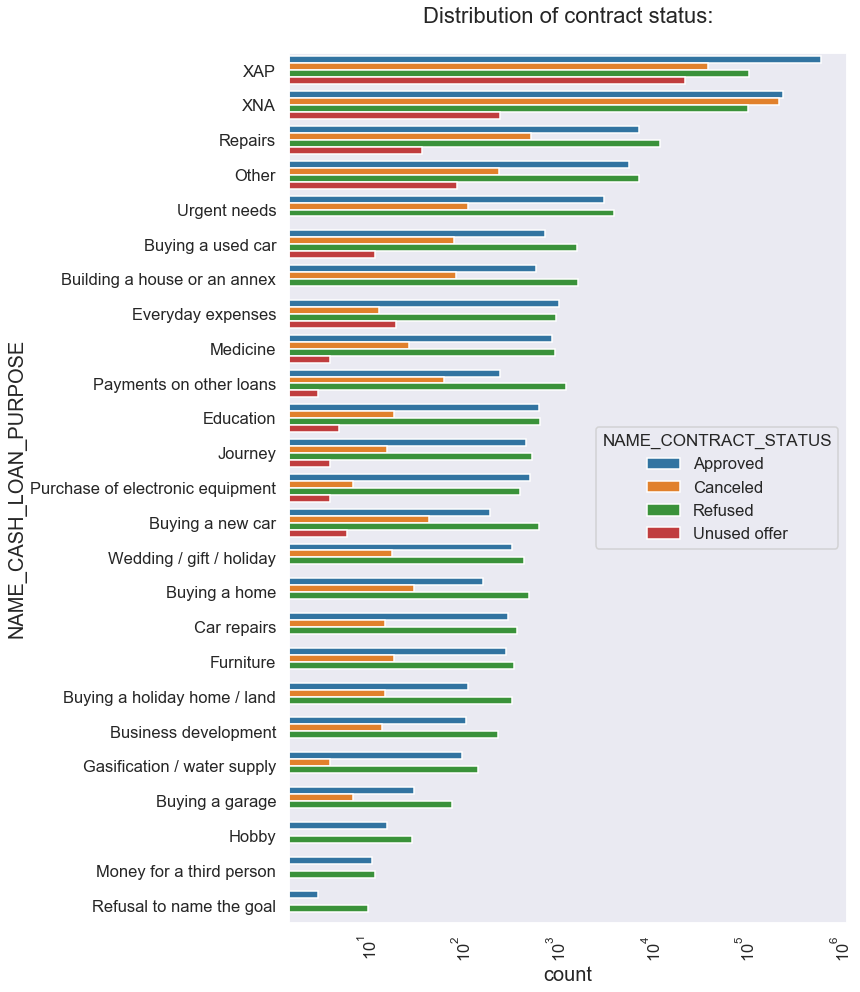

In [72]:
# Distribution of cash loan purpose in logarithmic scale

sns.set_style('dark')
sns.set_context('talk')

plt.figure(figsize=(10,16))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of contract status:')
ax = sns.countplot(data = merge_df, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=merge_df['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS') 



In [101]:
# Percentage Distribution of Cash Loans approved

CASH_LOAN_APROVED = approved.pivot_table(index='NAME_CASH_LOAN_PURPOSE',values='SK_ID_CURR', aggfunc = 'count')
CASH_LOAN_APROVED = pd.DataFrame(CASH_LOAN_APROVED.to_records())
CASH_LOAN_APROVED["Percentage_distribution"] = 0
CASH_LOAN_APROVED["Percentage_distribution"] = CASH_LOAN_APROVED["SK_ID_CURR"]/CLIENT_TYPE_DEFAULTERS["SK_ID_CURR"].sum()
print(CASH_LOAN_APROVED)

              NAME_CASH_LOAN_PURPOSE  SK_ID_CURR  Percentage_distribution
0       Building a house or an annex        1664                 0.006781
1               Business development         236                 0.000962
2                    Buying a garage          78                 0.000318
3       Buying a holiday home / land         333                 0.001357
4                      Buying a home         504                 0.002054
5                   Buying a new car         641                 0.002612
6                  Buying a used car        1630                 0.006642
7                        Car repairs         374                 0.001524
8                          Education         663                 0.002702
9                  Everyday expenses         963                 0.003924
10                         Furniture         351                 0.001430
11       Gasification / water supply         147                 0.000599
12                             Hobby  

In [102]:
# Percentage Distribution of Cash Loans refused

CASH_LOAN_REFUSED = refused.pivot_table(index='NAME_CASH_LOAN_PURPOSE',values='SK_ID_CURR', aggfunc = 'count')
CASH_LOAN_REFUSED = pd.DataFrame(CASH_LOAN_REFUSED.to_records())
CASH_LOAN_REFUSED["Percentage_distribution"] = 0
CASH_LOAN_REFUSED["Percentage_distribution"] = CASH_LOAN_REFUSED["SK_ID_CURR"]/CASH_LOAN_REFUSED["SK_ID_CURR"].sum()
print(CASH_LOAN_REFUSED)

              NAME_CASH_LOAN_PURPOSE  SK_ID_CURR  Percentage_distribution
0       Building a house or an annex        1664                 0.006781
1               Business development         236                 0.000962
2                    Buying a garage          78                 0.000318
3       Buying a holiday home / land         333                 0.001357
4                      Buying a home         504                 0.002054
5                   Buying a new car         641                 0.002612
6                  Buying a used car        1630                 0.006642
7                        Car repairs         374                 0.001524
8                          Education         663                 0.002702
9                  Everyday expenses         963                 0.003924
10                         Furniture         351                 0.001430
11       Gasification / water supply         147                 0.000599
12                             Hobby  

**Based on the distribution of Loan types above we can observe the following -**
There is a high rate of refusal for Repairs/ Other/ Urgent Needs/ Buying Used Car/ Building House or Annex
There is a a less rate of approval for Hobby/ Holiday Home / Business Development

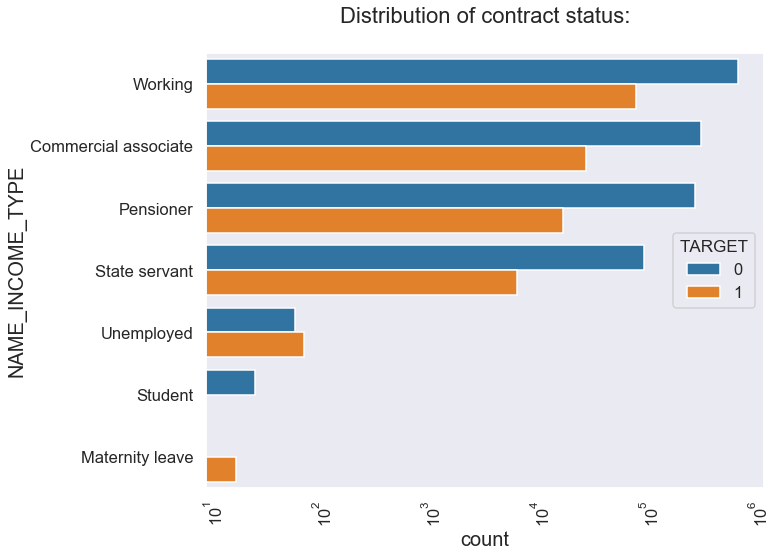

In [75]:
# Distribution of cash loan purpose in logarithmic scale

sns.set_style('dark')
sns.set_context('talk')

plt.figure(figsize=(10,8))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of contract status:')
ax = sns.countplot(data = merge_df, y= 'NAME_INCOME_TYPE', 
                   order=merge_df['NAME_INCOME_TYPE'].value_counts().index,hue = 'TARGET') 


In [105]:
# Percentage Distribution of Income type Defaulters

INCOME_TYPE_DEFAULTERS = merge_data_target1.pivot_table(index='NAME_INCOME_TYPE',values='SK_ID_CURR', aggfunc = 'count')
INCOME_TYPE_DEFAULTERS = pd.DataFrame(INCOME_TYPE_DEFAULTERS.to_records())
INCOME_TYPE_DEFAULTERS["Percentage_distribution"] = 0
INCOME_TYPE_DEFAULTERS["Percentage_distribution"] = INCOME_TYPE_DEFAULTERS["SK_ID_CURR"]/INCOME_TYPE_DEFAULTERS["SK_ID_CURR"].sum()
print(INCOME_TYPE_DEFAULTERS)

       NAME_INCOME_TYPE  SK_ID_CURR  Percentage_distribution
0  Commercial associate       26085                 0.213182
1       Maternity leave          16                 0.000131
2             Pensioner       15958                 0.130418
3         State servant        6054                 0.049477
4            Unemployed          67                 0.000548
5               Working       74180                 0.606244


**Based on the distribution of Income type above we can observe the following -**
There is no deafaulters in the students sector, for working section the defaulters are high as well as the payment

In [79]:
# Selecting few numerical columns for correlation

sel_col = ['CNT_CHILDREN', 'DAYS_TERMINATION', 'DAYS_LAST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 
           'DAYS_FIRST_DUE', 'DAYS_FIRST_DRAWING',  'AMT_INCOME_TOTAL', 
 'AMT_ANNUITY', 'CNT_PAYMENT', 'AMT_CREDIT', 'DAYS_DECISION', 'AMT_APPLICATION']

sel_col_corr = merge_df[sel_col]
correlation = sel_col_corr.corr()
round(correlation, 3)

,DAYS_TERMINATION,DAYS_LAST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_FIRST_DUE,DAYS_FIRST_DRAWING,AMT_INCOME_TOTAL,AMT_ANNUITY,CNT_PAYMENT,AMT_CREDIT,DAYS_DECISION,AMT_APPLICATION
DAYS_TERMINATION,1.000,0.928,0.490,0.321,-0.396,0.001,-0.060,0.065,-0.053,0.400,0.158
DAYS_LAST_DUE,0.928,1.000,0.415,0.397,-0.254,0.001,-0.064,0.102,-0.061,0.450,0.182
DAYS_LAST_DUE_1ST_VERSION,0.490,0.415,1.000,0.503,-0.809,0.007,0.002,-0.378,0.011,0.083,-0.087
DAYS_FIRST_DUE,0.321,0.397,0.503,1.000,0.004,-0.000,0.001,-0.199,0.002,0.178,-0.048
DAYS_FIRST_DRAWING,-0.396,-0.254,-0.809,0.004,1.000,-0.009,0.001,0.309,-0.007,-0.006,0.078
AMT_INCOME_TOTAL,0.001,0.001,0.007,-0.000,-0.009,1.000,0.206,0.021,0.166,0.004,0.071
AMT_ANNUITY,-0.060,-0.064,0.002,0.001,0.001,0.206,1.000,-0.006,0.758,-0.035,0.112
CNT_PAYMENT,0.065,0.102,-0.378,-0.199,0.309,0.021,-0.006,1.000,0.038,0.253,0.683
AMT_CREDIT,-0.053,-0.061,0.011,0.002,-0.007,0.166,0.758,0.038,1.000,-0.060,0.119
DAYS_DECISION,0.400,0.450,0.083,0.178,-0.006,0.004,-0.035,0.253,-0.060,1.000,0.141


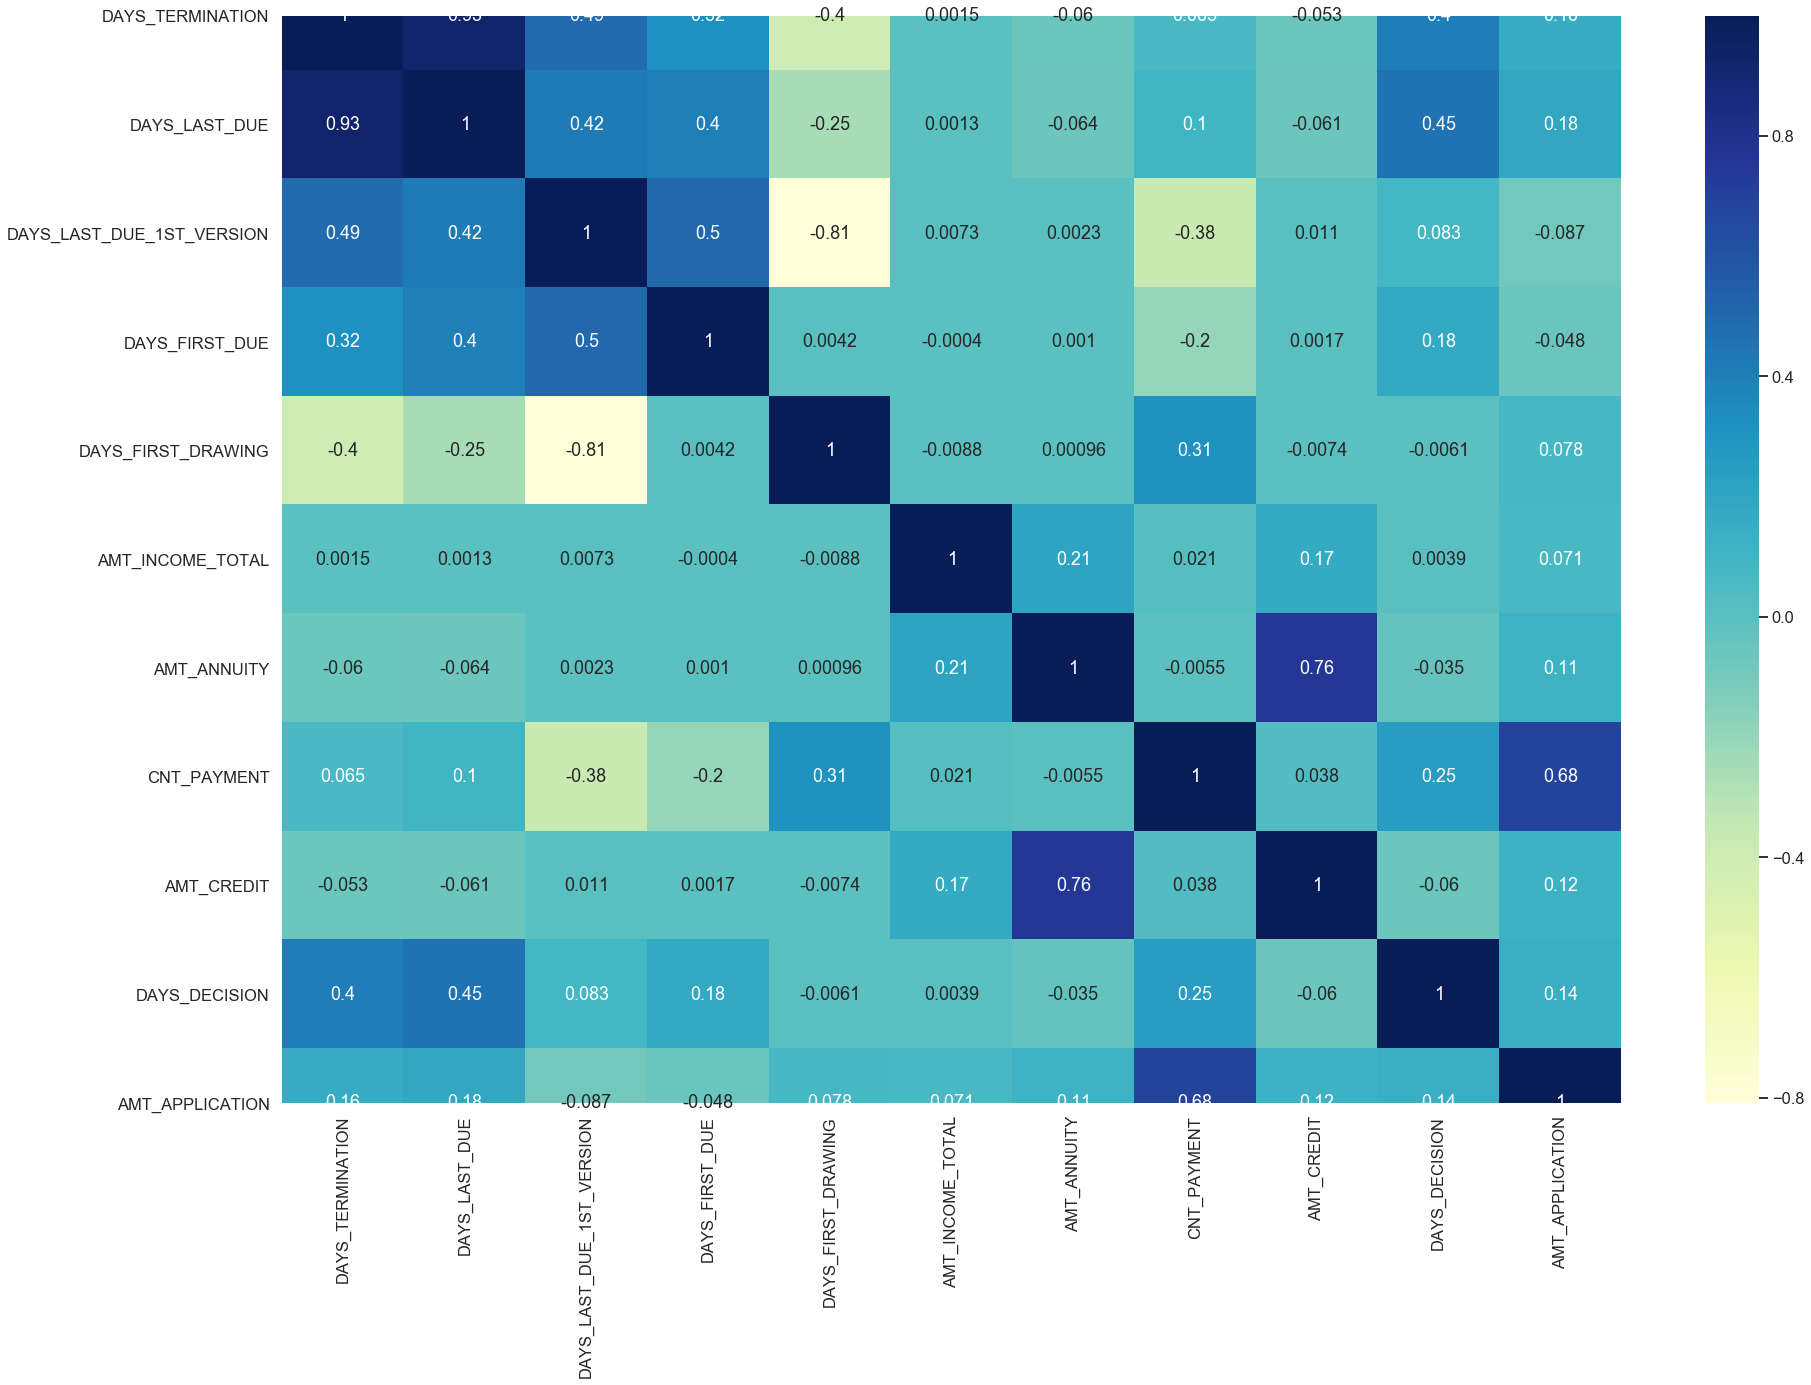

In [80]:
# Plotting heatmap for those columns

plt.figure(figsize=(30,20))

sns.heatmap(correlation, cmap="YlGnBu", annot=True)
plt.show()


**Observations from the heatmap**
Following varibales are considerably/strongly correlated - annuity amount and credit amount, days last due and days termination.
Following varibales are negatively correlated  - client payment and days last due, days last due and days first drawing

## Performing Bivariate Analysis on the merged Dataset

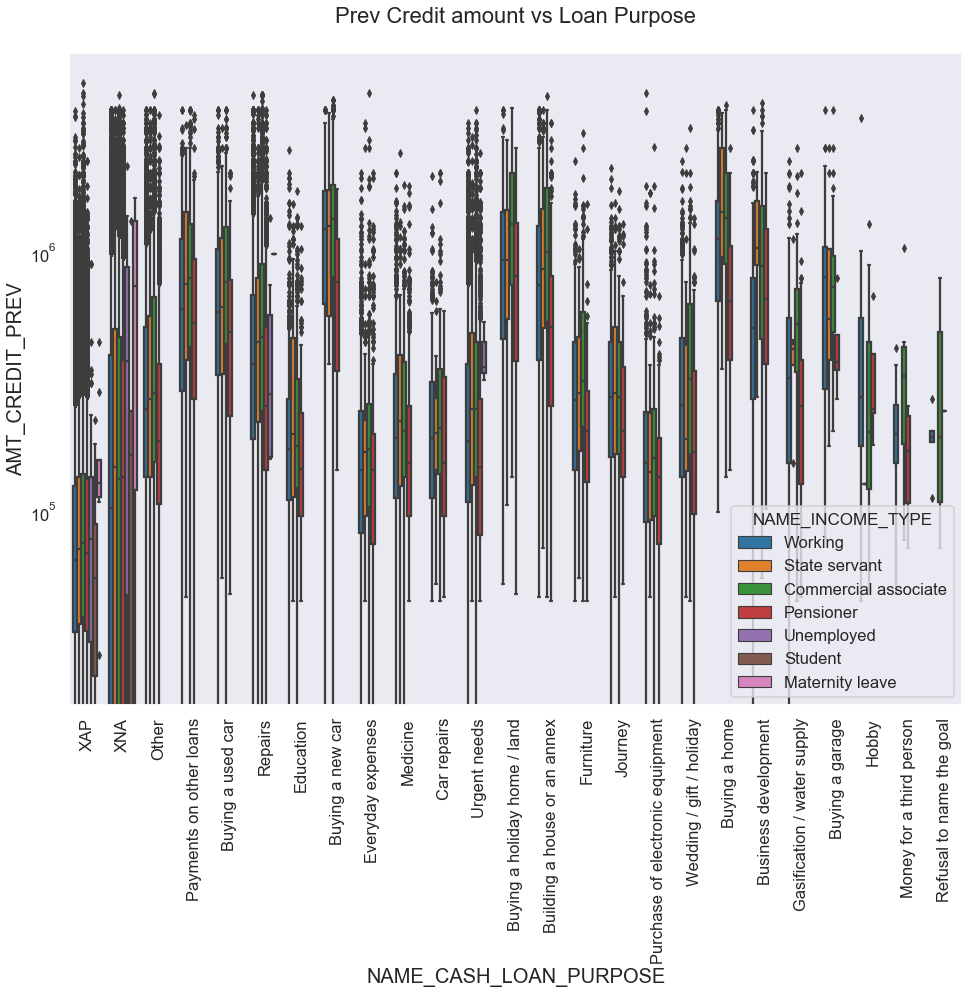

In [112]:
# Box plotting for Loan Purpose and Income Type in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
plt.yscale('log')
sns.boxplot(data =merge_df, x='NAME_CASH_LOAN_PURPOSE',hue='NAME_INCOME_TYPE',y='AMT_CREDIT_PREV',orient='v')
plt.title('Prev Credit amount vs Loan Purpose')
plt.show()

**From the above we can conclude some points-**

The credit amount of Loan purposes like 'Buying a home','Buying a land','Buying a new car' and'Building a house' is higher.
Income type of state servants have a significant amount of credit applied
Money for third person or a Hobby is having less credits applied for.

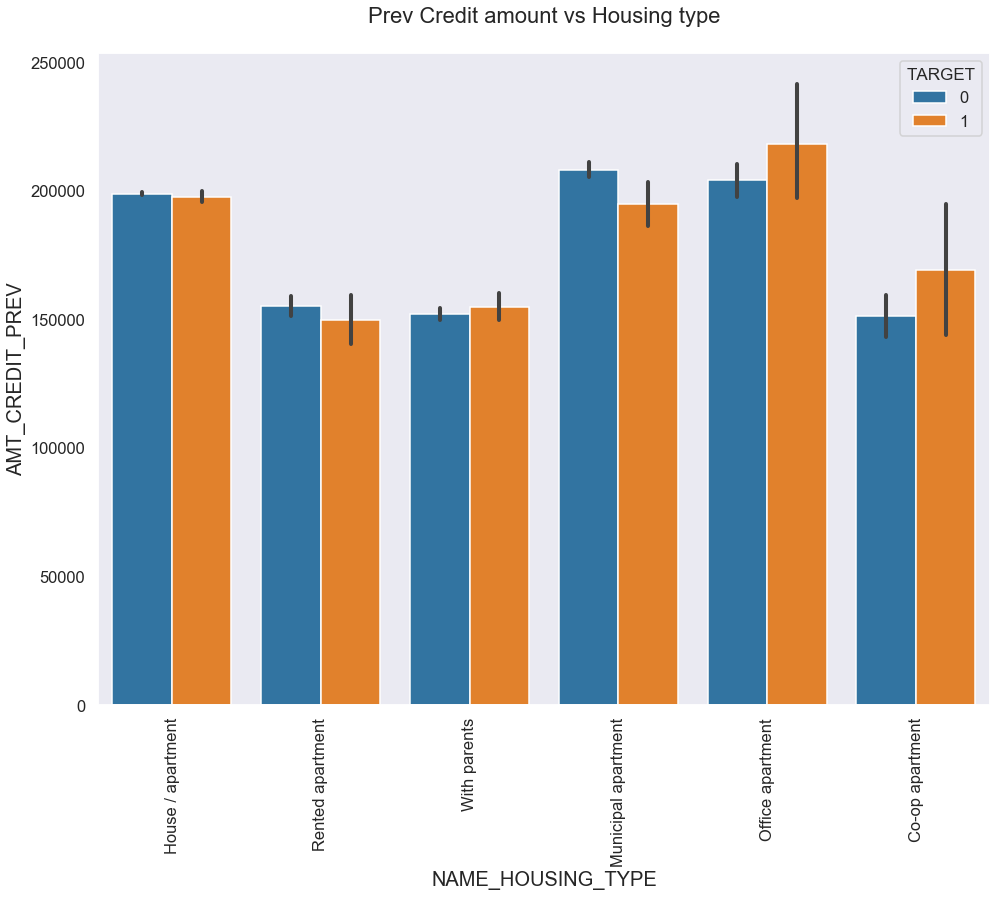

In [84]:
# Box plotting for Credit amount prev vs Housing type in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
sns.barplot(data =merge_df, y='AMT_CREDIT_PREV',hue='TARGET',x='NAME_HOUSING_TYPE')
plt.title('Prev Credit amount vs Housing type')
plt.show()

**Observations from Credit amount prev vs Housing type distribution**
People with previous credit amount and residing in office apartment have payment difficulties

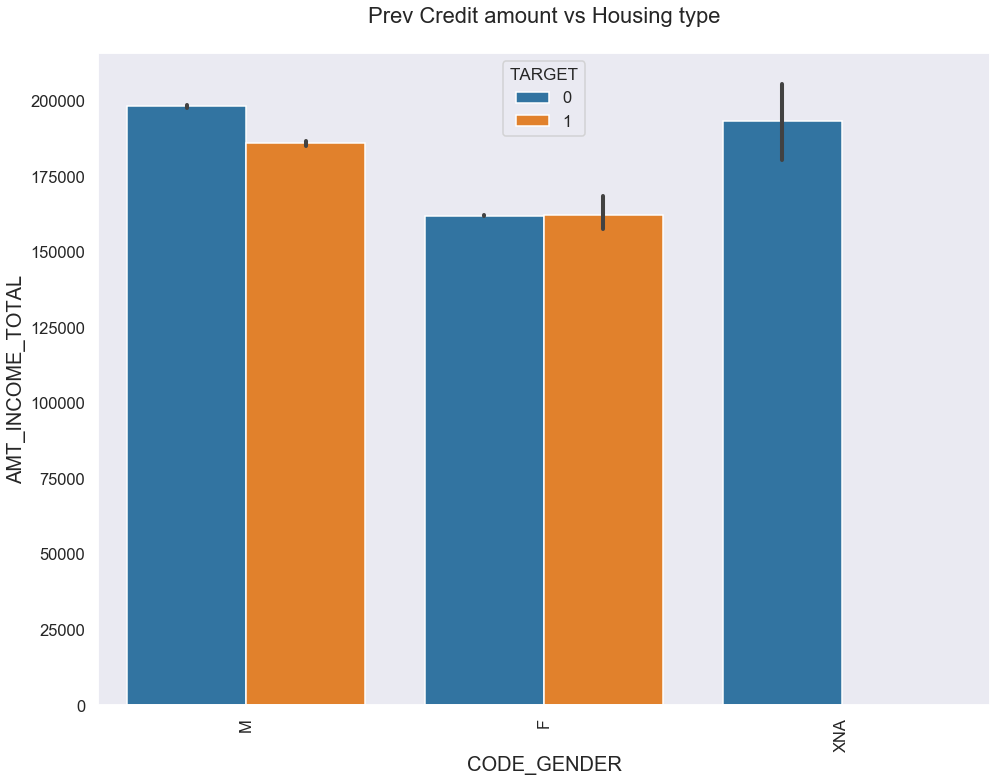

In [107]:
# Box plotting for total income vs gender in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
sns.barplot(data =merge_df, y='AMT_INCOME_TOTAL',hue='TARGET',x='CODE_GENDER')
plt.title('Prev Credit amount vs Housing type')
plt.show()

**Observations from total income vs gender distribution**
Women have less defaults compared to men

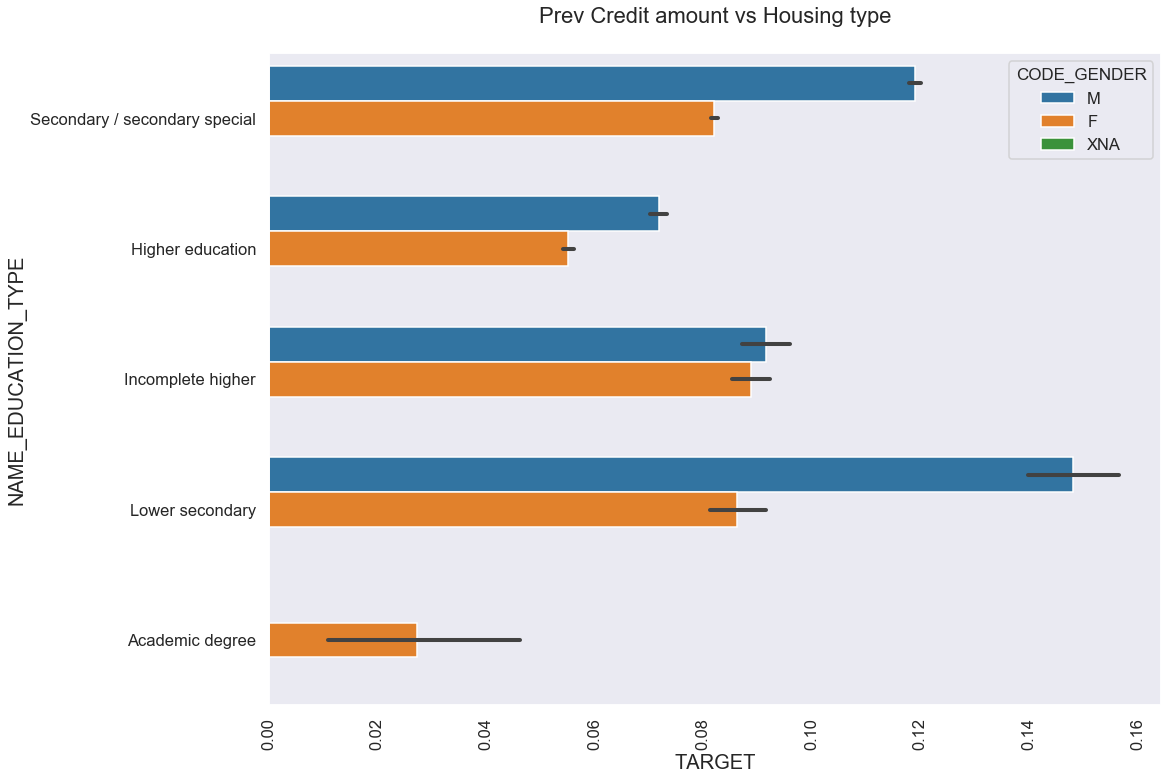

In [111]:
# Box plotting for education type vs gender in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
sns.barplot(data =merge_df, y='NAME_EDUCATION_TYPE',hue='CODE_GENDER',x='TARGET')
plt.title('Prev Credit amount vs Housing type')
plt.show()

## Conclusion

**1. Banks should focus more on income type 'Commercial Associate' and 'Working' and 'Pensioner' with housing ‘type other
     than ‘Co-op apartment’ for successful payments.**

**2. Also with loan purpose ‘Repair’ is having higher number of unsuccessful payments on time.**
